<a href="https://colab.research.google.com/github/notabd7/digit-recognizer/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plot

In [31]:
data = pd.read_csv('/content/train.csv')


In [32]:
#load data
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#I want mine in an array because of the mathematical operations involved pandas data fram does not allow us to do that
data = np.array(data)

In [60]:
#lets split our data into dev and train so we have a chunk of data aside to test our data on and then deploy our model on to get actual predictions
#this is so that our model does not make the error of over fitting that is making it so that our model is only accurate for the data it was trained on

#m and n, rows(examples) and columns(pixels) respectively
m, n = data.shape
#print(m)
#print(n)
#shuffling before splitting
np.random.shuffle(data)

#setting aside the first 1000 entries as training data
data_dev = data[0:1000].T
#m and n, rows(pixels) and columns(examples) respectively
#print(m)
#print(n)
label_dev = data_dev[0] #the actual number we want to predict, we know it in our training data because we are training lol, wont have this in the test
pixels_dev = data_dev[1:n]
pixels_dev = pixels_dev / 255

#setting aside the rest of the entries as test data
data_train = data[1000:m].T


label_train = data_train[0]
pixels_train = data_train[1:n]
pixels_train = pixels_train / 255
_,m_train = pixels_train.shape


In [61]:
label_train

array([2, 1, 2, ..., 2, 2, 5])

In [62]:
#lets inititalize all our paramenter, W1,W2, b1,b2 because we need to start with values that we will optimize
def initialize_parameters():
  w1 = np.random.rand(10,784) - 0.5 #the range corresponds to the matrices see readme file for the math
  b1 = np.random.randn(10,1) - 0.5
  w2 = np.random.randn(10,10) -0.5
  b2 = np.random.randn(10,1) -0.5
  return w1, b1, w2, b2

def RelU(z):
  #our activation func for a1
  return np.maximum(z, 0) #goes thru each elem in Z and checks if Z is greater than 0 then retruns Z else returns 0

def softMax(z):
   #each element is divided by the sum computed below /
   # preserves the amount of columns and collapses all rows by summing them so we can divide
#begin stage 1
  return (np.exp(z) / sum(np.exp(z)))

def forward_propogation(w1, b1, w2, b2, x):
  #lets calcluate z1 first
  z1 = w1.dot(x) + b1 # again see read me for math and follow thru
  a1 = RelU(z1)
  z2 = w2.dot(a1) + b2
  a2 = softMax(z2)
  return z1, a1, z2, a2

def one_hot(y):
  one_hot_Y = np.zeros((y.size, y.max() +1)) #creating another matric, where Y.size is the number of examples we have
  # where Y.max() +1 is 10 which the exact order of the matrix we require again see math first before code
  one_hot_Y[np.arange(y.size), y] = 1
  #this is what were doing here, were asking to go to the row (which we access
  # using arrays by np.arange() and the specific column Y (our labels) and set it to 1)
  one_hot_Y = one_hot_Y.T # we want to flip it because previouly each row is an example but we want eaach colums to be an example
  return one_hot_Y

  #func to het the derucative
def deriv_RelU(z):
  return z > 0

def backward_propogation(z1, a1, z2, a2, w1, w2, x, y):
  one_hot_Y = one_hot(y)
  dz2 = a2 - one_hot_Y
  dw2 = 1 / m * dz2.dot(a1.T)
  db2  = 1 / m * np.sum(dz2)
  dz1 = w2.T.dot(dz2) * deriv_RelU(z1)
  dw1 = 1 / m * dz1.dot(x.T)
  db1 = 1 / m * np.sum(dz1)
  return dw1, db1, dw2, db2

def  update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, gamma):
  w1 = w1 - gamma * dw1
  w2 = w2 - gamma * dw2
  b1 = b1 - gamma * db1
  b2 = b2 - gamma * db2

  return w1, b1, w2, b2






In [73]:
def get_predictions(a2):
  return np.argmax(a2, 0)

def get_accuracy(predictions, y):
  print(predictions, y)
  return np.sum(predictions == y) / y.size


def gradient_descent(x, y, gamma, iterations):
  w1, b1, w2, b2 = initialize_parameters()
  for i in range(iterations):
    z1, a1, z2, a2 = forward_propogation(w1, b1, w2, b2, x)
    dw1, db1, dw2, db2 = backward_propogation(z1, a1, z2, a2, w1, w2, x, y)
    w1, b1, w2, b2 = update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, gamma)
    if i % 20 == 0: # every 10th iteration
      print("Iteration: ", i)
      predictions = get_predictions(a2)
      print("Accuracy: ", get_accuracy(predictions, y))
  return w1, b1, w2, b2


In [74]:
w1, b1, w2, b2 = gradient_descent(pixels_train, label_train, 0.1, 1000) #1000 iterations and learning rate 0.1

Iteration:  0
[7 4 0 ... 0 0 0] [2 1 2 ... 2 2 5]
Accuracy:  0.09404878048780488
Iteration:  20
[7 4 6 ... 4 6 5] [2 1 2 ... 2 2 5]
Accuracy:  0.1945609756097561
Iteration:  40
[7 1 6 ... 4 6 5] [2 1 2 ... 2 2 5]
Accuracy:  0.30653658536585365
Iteration:  60
[6 1 6 ... 6 6 0] [2 1 2 ... 2 2 5]
Accuracy:  0.4157073170731707
Iteration:  80
[6 1 6 ... 6 6 0] [2 1 2 ... 2 2 5]
Accuracy:  0.49390243902439024
Iteration:  100
[6 1 6 ... 6 6 0] [2 1 2 ... 2 2 5]
Accuracy:  0.5430975609756098
Iteration:  120
[6 1 6 ... 6 2 0] [2 1 2 ... 2 2 5]
Accuracy:  0.5776585365853658
Iteration:  140
[6 1 6 ... 6 2 0] [2 1 2 ... 2 2 5]
Accuracy:  0.6050243902439024
Iteration:  160
[6 1 6 ... 6 2 0] [2 1 2 ... 2 2 5]
Accuracy:  0.6329024390243903
Iteration:  180
[6 1 6 ... 6 2 0] [2 1 2 ... 2 2 5]
Accuracy:  0.6574146341463415
Iteration:  200
[6 1 2 ... 6 2 0] [2 1 2 ... 2 2 5]
Accuracy:  0.6801463414634147
Iteration:  220
[6 1 2 ... 6 2 0] [2 1 2 ... 2 2 5]
Accuracy:  0.6971951219512195
Iteration:  240
[6 

85% accuracy

In [80]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_propogation(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = pixels_train[:, index, None]
    prediction = make_predictions(pixels_train[:, index, None], w1, b1, w2, b2)
    label = label_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plot.gray()
    plot.imshow(current_image, interpolation='nearest')
    plot.show()

Prediction:  [2]
Label:  2


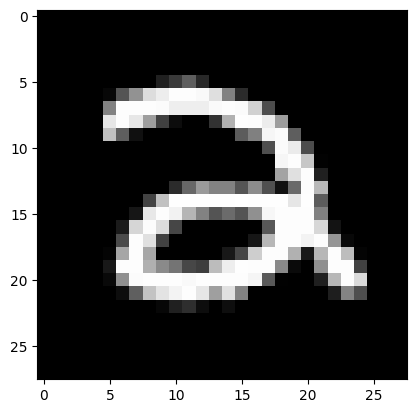

In [81]:
test_prediction(0, w1, b1, w2, b2)


Prediction:  [5]
Label:  5


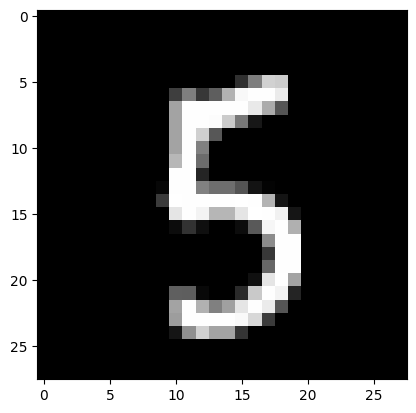

In [83]:
test_prediction(49, w1, b1, w2, b2)

Prediction:  [3]
Label:  3


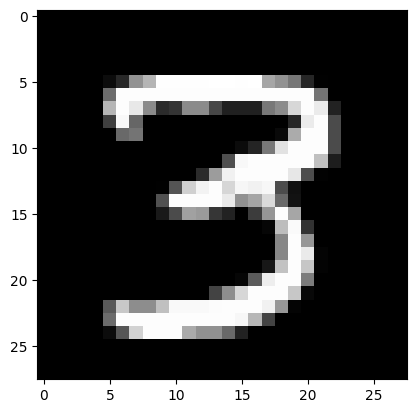

In [84]:
test_prediction(100, w1, b1, w2, b2)

Prediction:  [4]
Label:  9


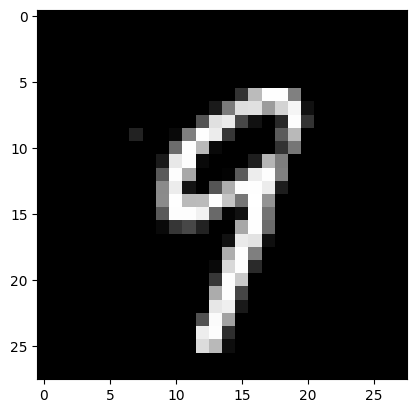

In [85]:
test_prediction(500, w1, b1, w2, b2)

Prediction:  [1]
Label:  1


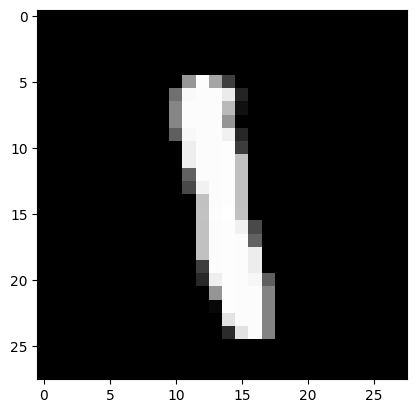

In [86]:
test_prediction(3, w1, b1, w2, b2)

In [96]:
#lets deploy it on actual data
dev_predictions = make_predictions(pixels_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, label_dev)

[7 3 0 8 6 6 2 4 2 1 6 1 2 6 0 7 6 6 5 1 0 2 7 2 5 5 4 1 6 7 5 3 4 2 0 2 1
 0 5 0 5 7 6 2 7 2 0 1 2 0 9 6 8 2 6 7 7 0 0 6 1 4 3 1 3 1 4 8 3 8 3 7 4 6
 7 2 4 1 9 9 0 1 2 5 2 7 3 1 0 0 6 2 2 0 7 3 5 3 3 5 0 7 7 5 5 8 5 1 1 6 6
 2 2 4 2 4 1 4 6 6 6 4 7 3 1 3 9 4 9 1 2 1 4 2 7 8 9 3 2 0 3 5 2 9 1 1 5 5
 3 6 6 5 0 5 7 8 3 9 2 0 8 0 5 6 6 9 5 9 0 4 2 9 9 4 0 9 8 8 9 8 2 9 9 7 2
 5 4 6 8 8 7 9 6 2 4 1 6 9 6 5 3 4 6 5 4 8 4 4 1 8 1 2 3 1 5 3 5 6 9 3 8 1
 4 5 8 6 1 7 3 7 6 4 0 6 8 8 0 7 8 8 3 0 0 9 6 0 7 9 1 2 2 0 7 6 1 4 2 6 8
 7 7 4 8 9 7 2 8 1 3 5 6 5 5 1 7 0 2 5 8 3 8 7 0 4 6 0 5 3 1 9 1 8 5 4 9 2
 4 5 6 8 6 7 7 7 8 8 2 6 3 3 1 3 3 1 0 9 1 5 3 3 2 8 4 8 0 7 4 6 1 6 1 1 3
 3 8 4 5 5 2 8 1 7 1 8 6 9 7 2 0 6 9 6 9 0 4 5 7 5 4 5 2 2 1 4 2 9 9 8 3 3
 9 7 6 7 7 0 6 0 5 3 7 6 7 8 0 7 6 4 6 2 9 0 3 1 4 8 5 0 5 7 8 7 7 4 2 6 7
 3 7 1 1 2 4 8 2 8 2 6 6 8 2 1 6 9 8 3 0 1 5 8 1 3 5 8 1 3 5 8 3 9 7 0 9 3
 2 9 3 7 4 1 7 0 1 5 9 1 8 8 3 8 8 8 3 1 2 1 8 6 5 7 3 7 8 1 9 2 8 4 1 5 9
 1 6 1 9 5 4 1 0 5 9 7 5 

0.862

86% accuracy!

In [92]:
#data = pd.read_csv('/content/test.csv')

In [93]:
#test_data = np.array(test_data)

In [94]:
#dev_predictions = make_predictions(data, w1, b1, w2, b2)


ValueError: shapes (10,784) and (28000,784) not aligned: 784 (dim 1) != 28000 (dim 0)